In [55]:
from sklearn.decomposition import PCA
from os.path import join, curdir
import matplotlib.pyplot as plt
from random import choice
import seaborn as sns
import numpy as np
import json
import cv2

### Vector đặc trưng gương mặt 3D dùng PCA (phân tích thành phần chính)

Nạp database

In [12]:
db_path = join(curdir,"Database", "Database.json")
with open(db_path, "r") as db:
    database = json.load(db)

Dùng PCA giảm chiều vector đặc trưng còn 3 chiều

In [17]:
X = []
for embedding in database.values():
    for ebd in embedding:
        X.append(ebd)
pca = PCA(n_components=3).fit(X)

Vector đặc trưng của mỗi người

In [25]:
d = {}
for label, embedding in database.items():
    d[label] = []
    for ebd in embedding:
        d[label].append(pca.transform([ebd]))
print(d["Phuoc"])

[array([[-0.15908435, -0.22167621, -0.23907413]]), array([[-0.15447503, -0.24075867, -0.13027833]]), array([[-0.14009783, -0.32946621, -0.17789152]]), array([[-0.17831701, -0.32002417, -0.15755374]]), array([[-0.13211551, -0.20856399, -0.1856768 ]])]


Trực quan hóa 3 chiều

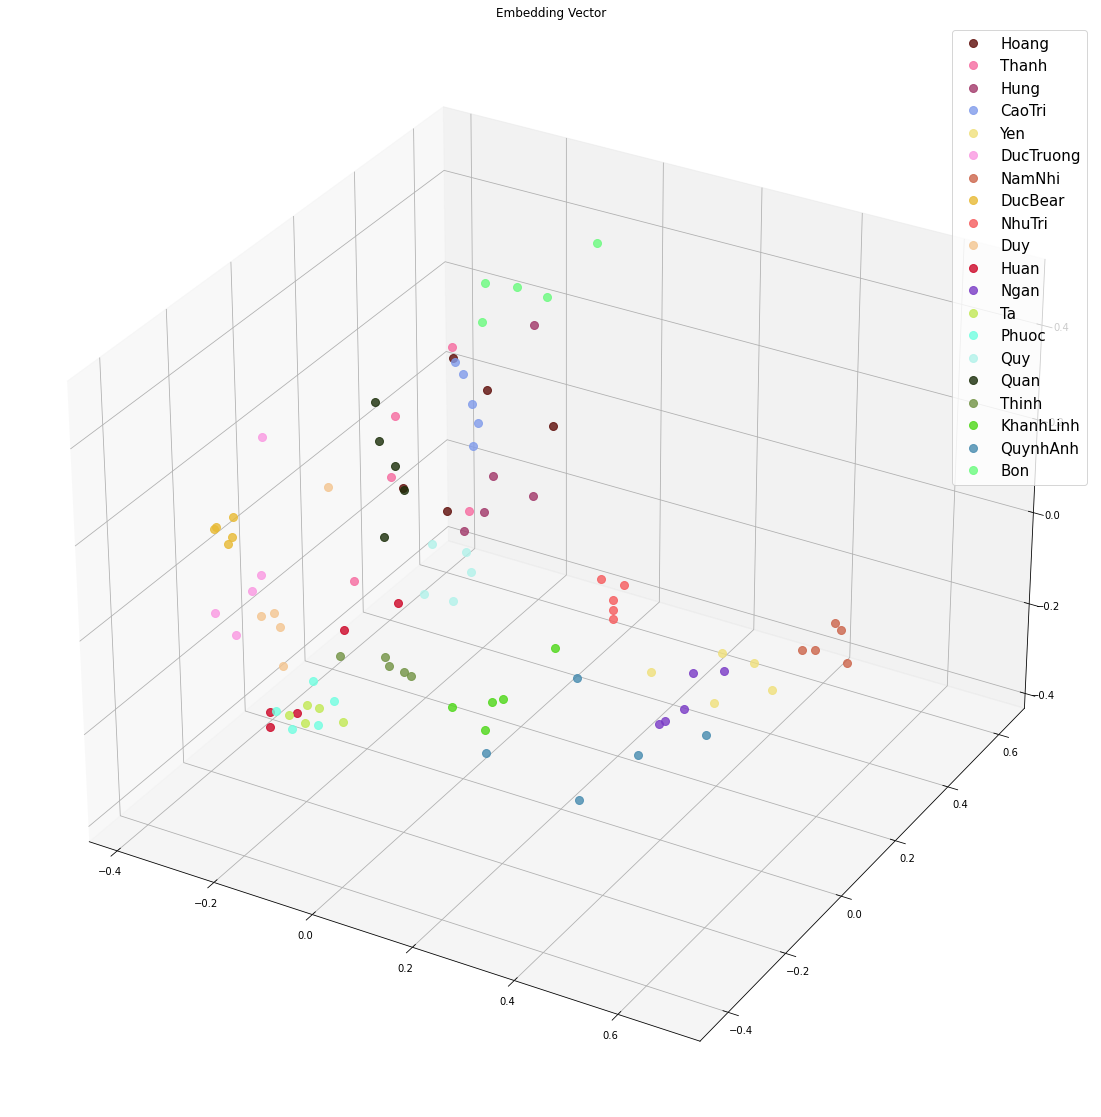

In [72]:
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 15

for label,ebd_pca in d.items():
    # Random 1 màu cho mỗi người
    color = "#"+''.join([choice("ABCDEF0123456789") for _ in range(6)])
    # Mỗi người chỉ cần 1 legend, legend là "" thì sẽ bị pylot bỏ qua
    for idx, ep in enumerate(ebd_pca):        
        ax.plot(ep[0][0], ep[0][1], ep[0][2],'o', markersize=8, 
                color=color, alpha=0.8, label=label if idx == 0 else "")

plt.title('Embedding Vector')
ax.legend()

Chỉ plot 1 vector/1 người

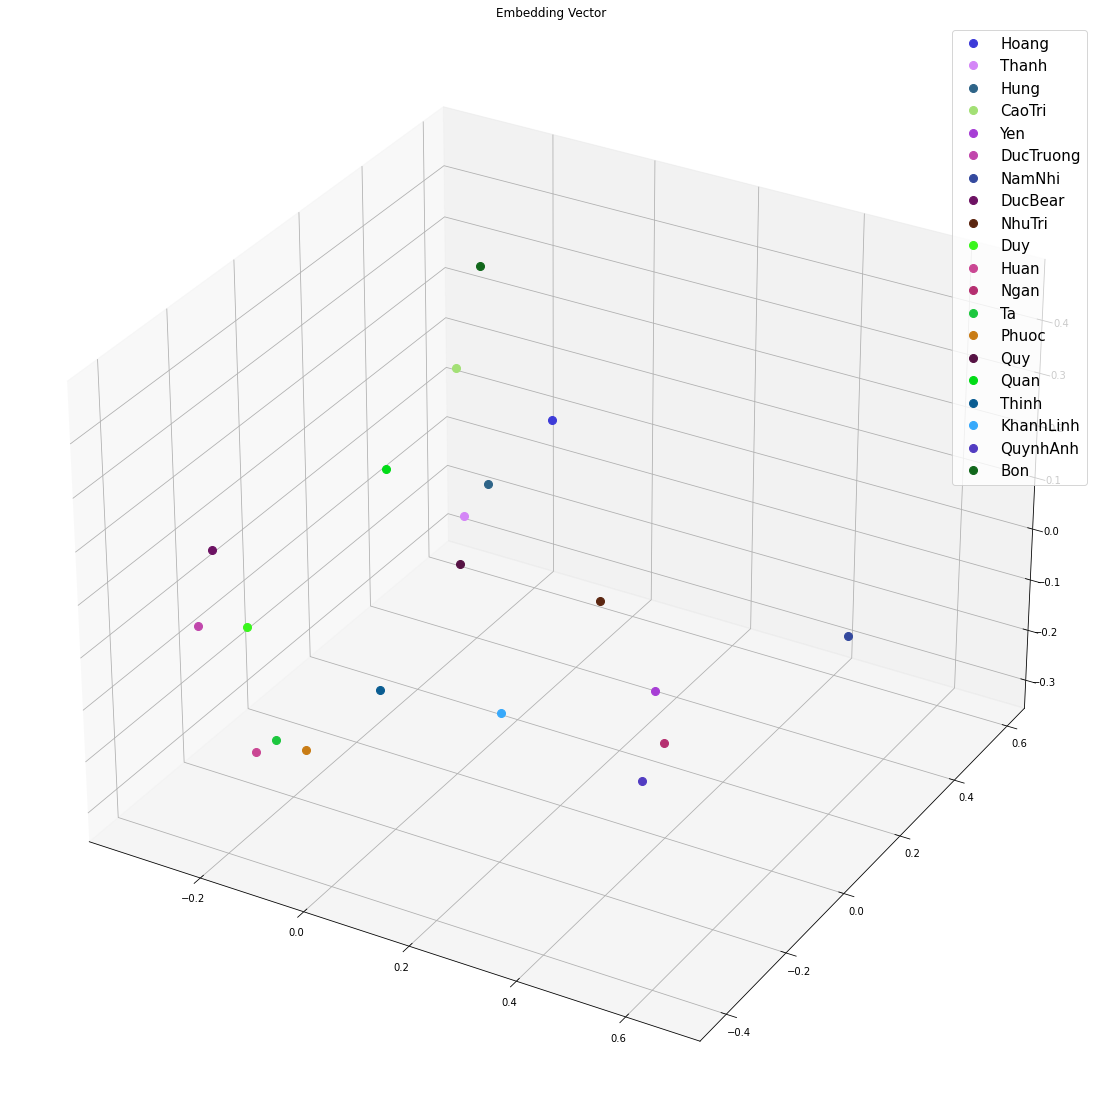

In [83]:
d = {}
for label, embedding in database.items():
    d[label] = pca.transform([embedding[0]])
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 15

for label, ebd_pca in d.items():
    color = "#"+''.join([choice("ABCDEF0123456789") for _ in range(6)])
    ax.plot(ebd_pca[0][0], ebd_pca[0][1], ebd_pca[0][2], 'o', markersize=8,
                color=color, alpha=1, label=label)

plt.title('Embedding Vector')
ax.legend()


### Cân bằng sáng (Histogram Equalization)

In [16]:
# Ngan, Phuoc, Thinh, Thanh
img_path = "../Sub-Module/FaceDetect/fd/Ngan_IMG_3246.JPG crop.png"
# img_path = "../Sub-Module/FaceDetect/fd/Phuoc_IMG_3263.JPG crop.png"
# img_path = "../Sub-Module/FaceDetect/fd/Thinh_IMG_3285.JPG crop.png"
# img_path = "../Sub-Module/FaceDetect/fd/Thanh_IMG_3280.JPG crop.png"

In [17]:
test_img = cv2.imread(img_path)
scale_percent = 40  # percent of original size
width = int(test_img.shape[1] * scale_percent / 100)
height = int(test_img.shape[0] * scale_percent / 100)
test_img = cv2.resize(test_img, (width, height))


yuv_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2YUV)
yuv_img[:, :, 0] = cv2.equalizeHist(yuv_img[:, :, 0])
equ = cv2.cvtColor(yuv_img, cv2.COLOR_YUV2BGR)

# Stacking images side-by-side
res = np.hstack((test_img, equ))

# Show image input vs output
cv2.imshow("", res)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Cân bằng sáng thích ứng (Adaptive Histogram Equalization)

In [18]:
test_img = cv2.imread(img_path)
scale_percent = 40  # percent of original size
width = int(test_img.shape[1] * scale_percent / 100)
height = int(test_img.shape[0] * scale_percent / 100)
test_img = cv2.resize(test_img, (width, height))

clahe = cv2.createCLAHE(clipLimit=1.5, tileGridSize=(8, 8))
yuv_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2YUV)
yuv_img[:, :, 0] = clahe.apply(yuv_img[:, :, 0])
equ = cv2.cvtColor(yuv_img, cv2.COLOR_YUV2BGR)

# Stacking images side-by-side
res = np.hstack((test_img, equ))

# Show image input vs output
cv2.imshow("", res)
cv2.waitKey(0)
cv2.destroyAllWindows()